In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import ipywidgets as wg



In [2]:
data = pd.read_csv("diabetes.csv")


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

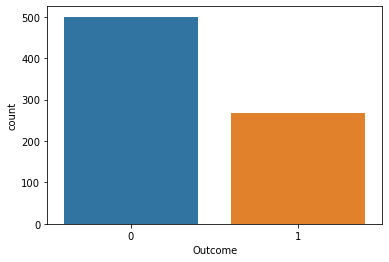

In [6]:
# Outcome graph
sns.countplot(data['Outcome'])

<AxesSubplot:>

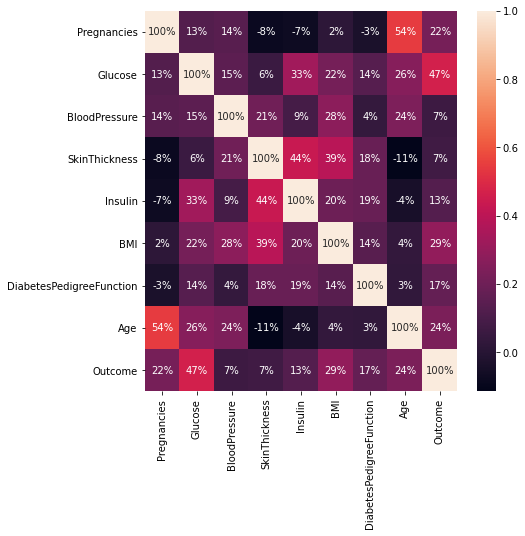

In [7]:
# correlation
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True, fmt='.0%')

In [8]:
X = data.iloc[:, : -1].values
Y = data.iloc[:, -1].values




In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)

In [10]:

input_value = np.array(X_train)
X_train



array([[  9.   , 145.   ,  80.   , ...,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,  62.   , ...,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   ,  74.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,  90.   , ...,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,  72.   , ...,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,  76.   , ...,  32.9  ,   0.665,  46.   ]])

In [11]:
input_value.shape

(614, 8)

In [12]:
output = np.array(Y_train)
output = output.reshape(614,1)
output.shape

(614, 1)

In [13]:
# assigning random weights values to each feature at first run
weights = np.array([[0.2],[0.1],[0.1],[0.2],[0.1],[0.2],[0.1],[0.2]])
weights

array([[0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.1],
       [0.2],
       [0.1],
       [0.2]])

In [14]:
# the sigmoid function to ensure that the output falls in between 0 and 1
def sigmoid_func(x):
    return 1/(1+np.exp(-x))
      

In [15]:
def deriv(x):
    return sigmoid_func(x) * (1- sigmoid_func(x))
    

In [16]:
bias =0.03

In [27]:
# the code needs to run 1000 times to get less error rate 
for epochs in range(1000):
    input_arr = input_value
    weighted_sum = np.dot(input_arr, weights)+ bias
    first_output = sigmoid_func(weighted_sum)
    
#   calculating the error value

    error = first_output - output
    total_error = np.square(np.subtract(first_output,output)).mean()
    
    first_der = error
    second_der = deriv(first_output)
    derivative = first_der * second_der
    
    t_input = input_value.T
    final_derivative = np.dot(t_input, derivative)
# updating weights
    weights = weights - 0.05 * final_derivative
    
# updating bias    
    for i in derivative:
        bias = bias - 0.5 * i
np.warnings.filterwarnings('ignore','(overflow|invalid)')
print(weights)
print(bias)


[[1383.70882733]
 [ 196.54334114]
 [-787.754036  ]
 [-202.34477406]
 [  53.66419201]
 [-451.98364485]
 [  29.68279518]
 [ -68.1844945 ]]
[-2908.44844859]


In [32]:
pred = np.array(X_test)
result = np.dot(pred , weights) + bias
res = sigmoid_func(result)
print(res)



[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [19]:
# drawing a sigmoid function graphs with X_test values
out = sigmoid_func(pred)
plt.plot(pred,out)
plt.xlabel("input")
plt.ylabel("output")


In [20]:
# Asking the user to key in the number of records he/she wants to see 
value = input("Please enter the number of record you want to see:\n")
value = int(value)

#button to view all the first n records 
button = wg.Button(description = "View Records")
display(button)

#function to be called by the button when clicked to view n recored inputed by user
def on_button_clicked(val):
    val = data.head(value)
    display(val)
button.on_click(on_button_clicked)



Please enter the number of record you want to see:
5


Button(description='View Records', style=ButtonStyle())

In [33]:
# asking the user to input the features
Pregnancies = input("Please enter the number of pregnacies:\n")
Pregnancies = int(Pregnancies)

Glucose = input("Please enter the number of Glucose:\n")
Glucose = int(Glucose)

BloodPressure = input("Please enter the number of BloodPressure:\n")
BloodPressure = int(BloodPressure)

skinThickness = input("Please enter the number of skinThickness:\n")
skinThickness = int(skinThickness)

insulin = input("Please enter the number of insulin:\n")
insulin = int(insulin)

BMI = input("Please enter the number of BMI :\n")
BMI = float(BMI)

DiabetesPedigreeFunction = input("Please enter the number of DiabetesPedigreeFunction:\n")
DiabetesPedigreeFunction = float(DiabetesPedigreeFunction)

age = input("Please enter the number of age:\n")
age = int(age)

# button to display the user results 
button = wg.Button(description ="send Data")


display(button)

# inserting all user inputs in an array
user_inputs = [Pregnancies,Glucose,BloodPressure,skinThickness,insulin,BMI,DiabetesPedigreeFunction,age]

# making a table to show the user his/her inputs 
value1 =[Pregnancies]
value2=[Glucose]
value3=[BloodPressure]
value4=[skinThickness]
value5=[insulin]
value6=[BMI]
value7=[DiabetesPedigreeFunction]
value8=[age]
user_info = pd.DataFrame({'Pregnancies':value1,'Glucose':value2,'BloodPressure':value3,'skinThickness':value4,'insulin':value5,
                          'BMI':value6,'DiabetesPedigreeFunction':value7,'age':value8})

# function to be caled by the send data buton to print the user results
def on_button_clicked(b):
    pred = np.array(user_inputs)
    result = np.dot(pred , weights) + bias
    res = sigmoid_func(result)
    print("Please confirm all your values below:\n")
    display(user_info)
    print("Your result is {}".format(res)+" therefore you are:")
    if res >= 0.5:
        print("diabitic")      
    else:
        print("Non-diabitic")
button.on_click(on_button_clicked)



Please enter the number of pregnacies:
5
Please enter the number of Glucose:
5
Please enter the number of BloodPressure:
5
Please enter the number of skinThickness:
5
Please enter the number of insulin:
5
Please enter the number of BMI :
5
Please enter the number of DiabetesPedigreeFunction:
5
Please enter the number of age:
5


Button(description='send Data', style=ButtonStyle())

Please confirm all your values below:



,Pregnancies,Glucose,BloodPressure,skinThickness,insulin,BMI,DiabetesPedigreeFunction,age
0,5,5,5,5,5,5.0,5.0,5


Your result is [0.] therefore you are:
Non-diabitic


##### 